In [29]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [20]:
data = pd.read_json("Sarcasm.json",lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [21]:
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [27]:
data.nunique()

article_link    26708
headline        26602
is_sarcastic        2
dtype: int64

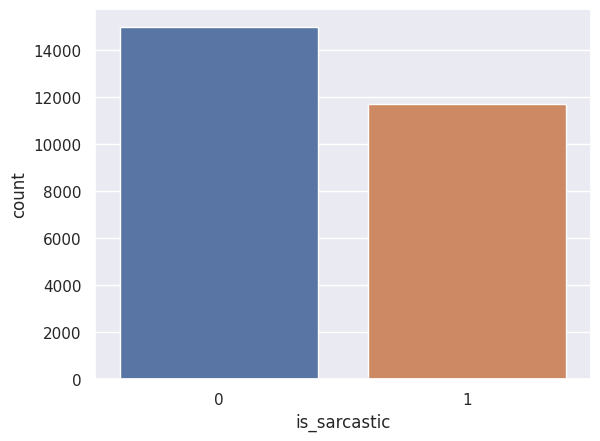

In [32]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sn.set(style="darkgrid")
sn.countplot(x ='is_sarcastic', data = data)
plt.show()

In [6]:
data['is_sarcastic'] = data['is_sarcastic'].map({0:"Not Sarcasm", 1: "Sarcasm"})
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,Not Sarcasm
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,Sarcasm
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",Sarcasm
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm


In [7]:
data = data[["headline", "is_sarcastic"]]

In [8]:
data

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Not Sarcasm
1,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,mom starting to fear son's web series closest ...,Sarcasm
3,"boehner just wants wife to listen, not come up...",Sarcasm
4,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm
...,...,...
26704,american politics in moral free-fall,Not Sarcasm
26705,america's best 20 hikes,Not Sarcasm
26706,reparations and obama,Not Sarcasm
26707,israeli ban targeting boycott supporters raise...,Not Sarcasm


In [9]:
x = np.array(data["headline"])
y = np.array(data["is_sarcastic"])

In [10]:
cv = CountVectorizer()
X= cv.fit_transform(x)

In [11]:
X_train , X_test ,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)


In [12]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8515537251965556


In [35]:
input_text = input("Enter a Text:")
data = cv.transform([input_text]).toarray()
output_text = model.predict(data)
print("So the text is:",output_text)

Enter a Text:Silence is golden. Duct tape is silver.
So the text is: ['Not Sarcasm']
